## Download Company data

In [13]:
import requests

def download_excel(company_name):
    # Construct the correct URL based on the website's structure
    url = f"https://www.screener.in/company/{company_name}/"

    # Replace this payload with the actual csrfmiddlewaretoken value
    payload = {
        'csrfmiddlewaretoken': 'cmfHDrRznDB5CXAGVFcQ4bHnWXdSEg3jCZWQJ3TRweOLkn1EcHI6r3RvcOWUMcLp',
        'next': f'/company/{company_name}/consolidated/'
    }

    # Replace this with the actual cookie value
    cookies = {
        'csrftoken': 'ANRjgMcsjLnQSAB8rcGqx2kiq1Tci6Sg',
        'sessionid': 'gsblyiotrq9442ka3t5vo75c9so0lm63'
    }

    # Replace this with the actual user-agent value
    headers = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
        'Content-Type': 'application/x-www-form-urlencoded',
        'Referer': f'https://www.screener.in/company/{company_name}/consolidated/',  # Add the referer URL here
    }

    # Send the POST request
    response = requests.post(url, data=payload, headers=headers, cookies=cookies)

    # Check if the request was successful (Status Code 200)
    if response.status_code == 200:
        # Save the content of the response to a file
        with open(f'{company_name}.xlsx', 'wb') as file:
            file.write(response.content)
        print(f"File for {company_name} downloaded successfully.")
    else:
        print(f"Error for {company_name}: {response.status_code} - {response.text}")

# Example usage:
company_name = "ITC"  # Replace this with the desired company name
download_excel(company_name)


File for ITC downloaded successfully.


## Download multiple stock

In [1]:
import os
import requests

def download_excel(company_name):
    # Construct the correct URL based on the website's structure
    url = f"https://www.screener.in/company/{company_name}/"

    # Replace this payload with the actual csrfmiddlewaretoken value
    payload = {
        'csrfmiddlewaretoken': 'cmfHDrRznDB5CXAGVFcQ4bHnWXdSEg3jCZWQJ3TRweOLkn1EcHI6r3RvcOWUMcLp',
        'next': f'/company/{company_name}/consolidated/'
    }

    # Replace this with the actual cookie value
    cookies = {
        'csrftoken': 'ANRjgMcsjLnQSAB8rcGqx2kiq1Tci6Sg',
        'sessionid': 'gsblyiotrq9442ka3t5vo75c9so0lm63'
    }

    # Replace this with the actual user-agent value
    headers = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
        'Content-Type': 'application/x-www-form-urlencoded',
        'Referer': f'https://www.screener.in/company/{company_name}/consolidated/',  # Add the referer URL here
    }

    # Send the POST request
    response = requests.post(url, data=payload, headers=headers, cookies=cookies)

    # Check if the request was successful (Status Code 200)
    if response.status_code == 200:
        # Save the content of the response to a file
        with open(f'{company_name}.xlsx', 'wb') as file:
            file.write(response.content)
        print(f"File for {company_name} downloaded successfully.")
        return True  # Signal that the file was downloaded successfully
    else:
        print(f"Error for {company_name}: {response.status_code} - {response.text}")
        return False  # Signal that there was an error downloading the file

# Example usage:
stock_list = ["IOC","HSCL"]

for stock in stock_list:
    download_path = "./"
    file_downloaded = download_excel(stock)

    # If file was downloaded successfully, proceed with the next stock
    if file_downloaded:
        print(f"Proceeding to the next stock...")
    else:
        print(f"Skipping to the next stock due to the error.")


File for IOC downloaded successfully.
Proceeding to the next stock...
File for HSCL downloaded successfully.
Proceeding to the next stock...


In [2]:
import pandas as pd
from bs4 import BeautifulSoup

# Load HTML content from the file
with open('HSCL.xlsx', 'r', encoding='utf-8') as html_file:
    html_content = html_file.read()

# Parse HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

# Iterate through each table and convert it to CSV
for i, table in enumerate(tables, start=1):
    # Convert the table to a DataFrame
    df = pd.read_html(str(table), flavor='bs4')[0]

    # Save DataFrame to a CSV file
    csv_file_path = f'table_{i}.csv'
    df.to_csv(csv_file_path, index=False, encoding='utf-8')

    print(f'Table {i} converted to CSV: {csv_file_path}')


Table 1 converted to CSV: table_1.csv
Table 2 converted to CSV: table_2.csv
Table 3 converted to CSV: table_3.csv
Table 4 converted to CSV: table_4.csv
Table 5 converted to CSV: table_5.csv
Table 6 converted to CSV: table_6.csv
Table 7 converted to CSV: table_7.csv
Table 8 converted to CSV: table_8.csv
Table 9 converted to CSV: table_9.csv
Table 10 converted to CSV: table_10.csv
Table 11 converted to CSV: table_11.csv


In [3]:
import pandas as pd
from bs4 import BeautifulSoup

def convert_html_to_csv(file_path):
    # Load HTML content from the file
    with open(file_path, 'r', encoding='utf-8') as html_file:
        html_content = html_file.read()

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all h2 elements in the HTML
    h2_elements = soup.find_all('h2')

    # Iterate through each h2 element and convert the corresponding table to CSV
    for i, h2 in enumerate(h2_elements, start=1):
        # Extract the table name from the h2 element
        table_name = h2.get_text(strip=True)

        # Find the corresponding table following the h2 element
        table = h2.find_next('table')

        # Check if a table was found
        if table:
            # Convert the table to a DataFrame
            df = pd.read_html(str(table), flavor='bs4')[0]

            # Define CSV file name based on the extracted table name
            csv_file_path = f'{table_name}.csv'

            # Save DataFrame to a CSV file
            df.to_csv(csv_file_path, index=False, encoding='utf-8')

            print(f'Table {i} ({table_name}) converted to CSV: {csv_file_path}')
        else:
            print(f'No table found for {table_name}')

# Example usage:
convert_html_to_csv('HSCL.xlsx')


Table 1 (Peer comparison) converted to CSV: Peer comparison.csv
Table 2 (Quarterly Results) converted to CSV: Quarterly Results.csv
Table 3 (Profit & Loss) converted to CSV: Profit & Loss.csv
Table 4 (Balance Sheet) converted to CSV: Balance Sheet.csv
Table 5 (Cash Flows) converted to CSV: Cash Flows.csv
Table 6 (Ratios) converted to CSV: Ratios.csv
Table 7 (Shareholding Pattern) converted to CSV: Shareholding Pattern.csv
No table found for Documents


In [6]:
import pandas as pd
from bs4 import BeautifulSoup

def convert_html_to_csv(file_path):
    # Load HTML content from the file
    with open(file_path, 'r', encoding='utf-8') as html_file:
        html_content = html_file.read()

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all h2 elements in the HTML
    h2_elements = soup.find_all('h2')

    # Iterate through each h2 element and convert the corresponding table to CSV
    for i, h2 in enumerate(h2_elements, start=1):
        # Extract the table name from the h2 element
        table_name = h2.get_text(strip=True)

        # Find the corresponding table following the h2 element
        table = h2.find_next('table')

        # Check if a table was found
        if table:
            # Convert the table to a DataFrame
            df = pd.read_html(str(table), flavor='bs4')[0]

            # Define CSV file name based on the extracted table name
            csv_file_path = f'{table_name.lower().replace(" ", "_")}.csv'

            # Save DataFrame to a CSV file
            df.to_csv(csv_file_path, index=False, encoding='utf-8')

            print(f'Table {i} ({table_name}) converted to CSV: {csv_file_path}')
        else:
            print(f'No table found for {table_name}')

    # Extract content under "top-ratios" ul element
    top_ratios_ul = soup.find('ul', {'id': 'top-ratios'})
    if top_ratios_ul:
        # Extract content under "top-ratios"
        top_ratios_content = [{'Text': li.find('span', {'class': 'name'}).get_text(strip=True),
                               'Numbers': li.find('span', {'class': 'number'}).get_text(strip=True)}
                              for li in top_ratios_ul.find_all('li')]

        # Create DataFrame from the extracted content
        top_ratios_df = pd.DataFrame(top_ratios_content)

        # Save the content to a CSV file
        top_ratios_csv_path = 'top_ratios.csv'
        top_ratios_df.to_csv(top_ratios_csv_path, index=False, encoding='utf-8')

        print(f'Top Ratios content separated and converted to CSV: {top_ratios_csv_path}')
    else:
        print('No "top-ratios" ul element found.')

# Example usage:
convert_html_to_csv('HSCL.xlsx')


Table 1 (Peer comparison) converted to CSV: peer_comparison.csv
Table 2 (Quarterly Results) converted to CSV: quarterly_results.csv
Table 3 (Profit & Loss) converted to CSV: profit_&_loss.csv
Table 4 (Balance Sheet) converted to CSV: balance_sheet.csv
Table 5 (Cash Flows) converted to CSV: cash_flows.csv
Table 6 (Ratios) converted to CSV: ratios.csv
Table 7 (Shareholding Pattern) converted to CSV: shareholding_pattern.csv
No table found for Documents
Top Ratios content separated and converted to CSV: top_ratios.csv


## Create folder and save data

In [6]:
import os
import pandas as pd
from bs4 import BeautifulSoup

def convert_html_to_csv(file_path):
    # Load HTML content from the file
    with open(file_path, 'r', encoding='utf-8') as html_file:
        html_content = html_file.read()

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract file name (excluding extension) for folder creation
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    # Create a folder with the file name if it doesn't exist
    folder_path = file_name
    os.makedirs(folder_path, exist_ok=True)

    # Find all h2 elements in the HTML
    h2_elements = soup.find_all('h2')

    # Iterate through each h2 element and convert the corresponding table to CSV
    for i, h2 in enumerate(h2_elements, start=1):
        # Extract the table name from the h2 element
        table_name = h2.get_text(strip=True)

        # Find the corresponding table following the h2 element
        table = h2.find_next('table')

        # Check if a table was found
        if table:
            # Convert the table to a DataFrame
            df = pd.read_html(str(table), flavor='bs4')[0]

            # Define CSV file path based on the extracted table name and folder
            csv_file_path = os.path.join(folder_path, f'{table_name.lower().replace(" ", "_")}.csv')

            # Save DataFrame to a CSV file
            df.to_csv(csv_file_path, index=False, encoding='utf-8')

            print(f'Table {i} ({table_name}) converted to CSV: {csv_file_path}')
        else:
            print(f'No table found for {table_name}')

    # Extract content under "top-ratios" ul element
    top_ratios_ul = soup.find('ul', {'id': 'top-ratios'})
    if top_ratios_ul:
        # Extract content under "top-ratios"
        top_ratios_content = [{'Text': li.find('span', {'class': 'name'}).get_text(strip=True),
                               'Numbers': li.find('span', {'class': 'number'}).get_text(strip=True)}
                              for li in top_ratios_ul.find_all('li')]

        # Create DataFrame from the extracted content
        top_ratios_df = pd.DataFrame(top_ratios_content)

        # Define CSV file path for top ratios based on the folder
        top_ratios_csv_path = os.path.join(folder_path, 'top_ratios.csv')

        # Save the content to a CSV file
        top_ratios_df.to_csv(top_ratios_csv_path, index=False, encoding='utf-8')

        print(f'Top Ratios content separated and converted to CSV: {top_ratios_csv_path}')
    else:
        print('No "top-ratios" ul element found.')

# Example usage:
convert_html_to_csv('HSCL.xlsx')


Table 1 (Peer comparison) converted to CSV: HSCL/peer_comparison.csv
Table 2 (Quarterly Results) converted to CSV: HSCL/quarterly_results.csv
Table 3 (Profit & Loss) converted to CSV: HSCL/profit_&_loss.csv
Table 4 (Balance Sheet) converted to CSV: HSCL/balance_sheet.csv
Table 5 (Cash Flows) converted to CSV: HSCL/cash_flows.csv
Table 6 (Ratios) converted to CSV: HSCL/ratios.csv
Table 7 (Shareholding Pattern) converted to CSV: HSCL/shareholding_pattern.csv
No table found for Documents
Top Ratios content separated and converted to CSV: HSCL/top_ratios.csv


## Analyse the data

### Analyse PnL

In [15]:
import pandas as pd

# Define the folder path and CSV file name
folder_path = 'HSCL'
csv_file_name = 'profit_&_loss.csv'

# Create the full path to the CSV file
csv_file_path = os.path.join(folder_path, csv_file_name)

# Check if the CSV file exists
if os.path.exists(csv_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path, index_col=0)  # Assuming the first column is the index

    # Display the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())

    # Extract specific columns
    selected_columns = ['Year', 'Sales']


First few rows of the DataFrame:
                 Mar 2012 Mar 2013 Mar 2014 Mar 2015 Mar 2016 Mar 2017  \
Unnamed: 0                                                               
Sales +              1123     1299     1362     1377     1150     1322   
Expenses +            941     1181     1268     1261     1009     1095   
Operating Profit      182      118       94      116      142      227   
OPM %                 16%       9%       7%       8%      12%      17%   
Other Income +         20       30       21       15       11        8   

                 Mar 2018 Mar 2019 Mar 2020 Mar 2021 Mar 2022 Mar 2023   TTM  
Unnamed: 0                                                                    
Sales +              1971     2377     1804     1679     2791     4172  4037  
Expenses +           1521     1838     1520     1552     2637     3783  3447  
Operating Profit      450      538      284      128      154      388   590  
OPM %                 23%      23%      16%       8% 

## renamed the column

In [69]:
# Rename the 'Unnamed: 0' column to 'Date'
df = df.rename(columns={'Date': 'Data'})

# Save the modified DataFrame to a new CSV file
df.to_csv('HSCL/profit_&_loss.csv', index=False)


In [97]:
second_row = df.iloc[3]
print(second_row)

Data        OPM %
Mar 2012      16%
Mar 2013       9%
Mar 2014       7%
Mar 2015       8%
Mar 2016      12%
Mar 2017      17%
Mar 2018      23%
Mar 2019      23%
Mar 2020      16%
Mar 2021       8%
Mar 2022       6%
Mar 2023       9%
TTM           15%
Name: 3, dtype: object


/tmp/ipykernel_20062/3311145901.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



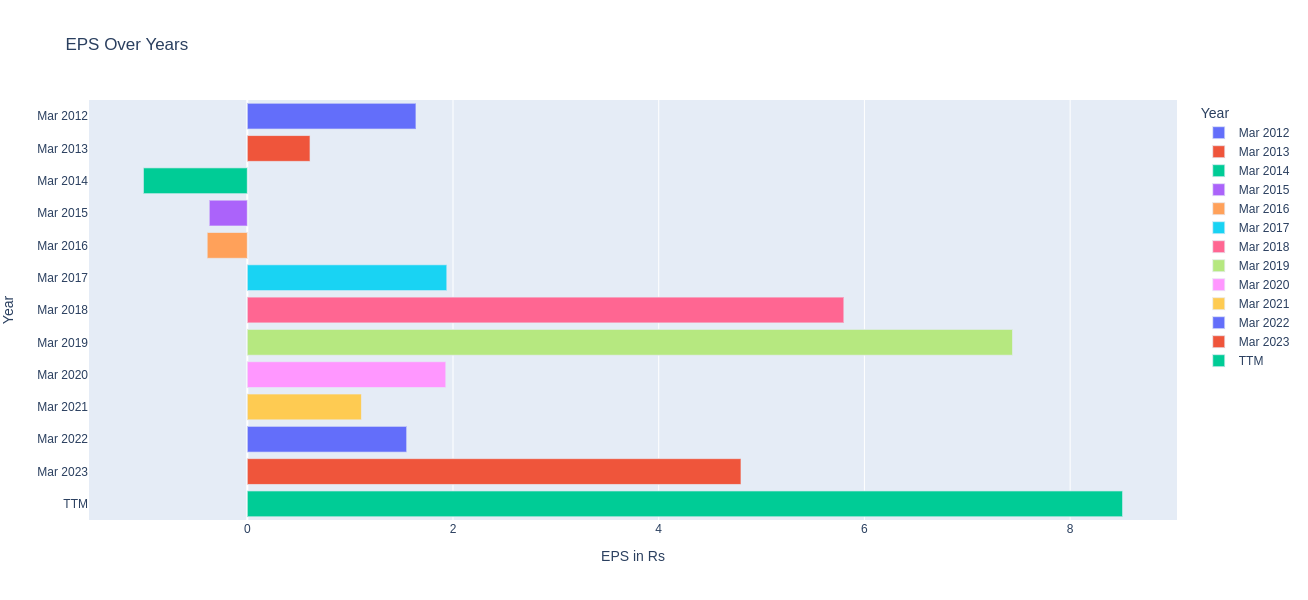

In [72]:
import pandas as pd
import plotly.express as px

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'HSCL/profit_&_loss.csv'



# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter the DataFrame to include only the "EPS in Rs" rows
df_eps = df[df['Data'].str.strip() == 'EPS in Rs']

# Convert numeric columns to numeric type
numeric_columns = df_eps.columns[1:]
df_eps[numeric_columns] = df_eps[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Melt the DataFrame for Plotly Express
df_eps_melted = pd.melt(df_eps, id_vars='Data', var_name='Year', value_name='EPS in Rs')

# Create a horizontal bar plot using Plotly Express
fig = px.bar(df_eps_melted, x='EPS in Rs', y='Year', color='Year', orientation='h',
             labels={'EPS in Rs': 'EPS in Rs'}, title='EPS Over Years')


# Increase the size of the plot
fig.update_layout(height=600, width=1500)

# Show the plot
fig.show()





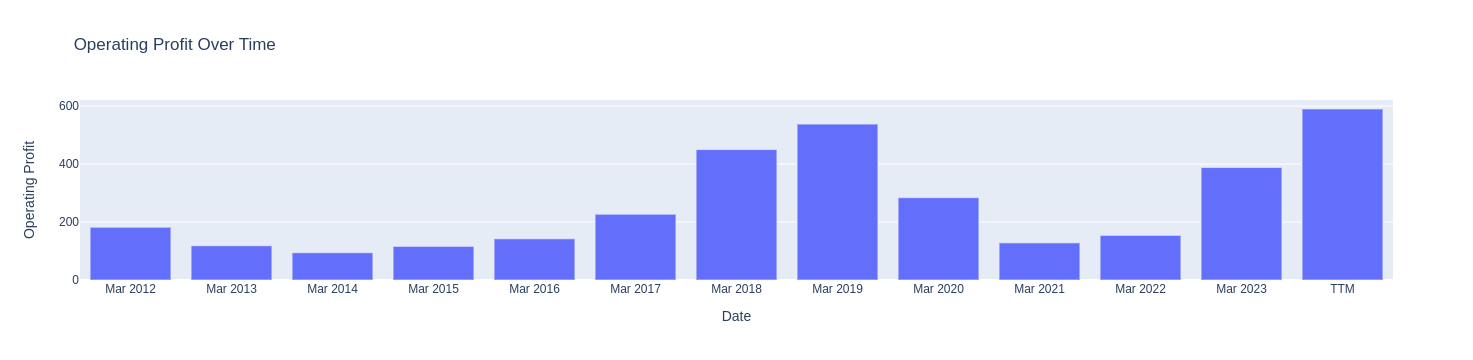

In [93]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
second_row = df.iloc[2]

# Filter out non-numeric values and convert to float
numeric_values = pd.to_numeric(second_row[1:], errors='coerce')

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Date': second_row.index[1:],
    'Operating Profit': numeric_values
})

# Create a bar plot using Plotly Express
fig = px.bar(plot_data, x='Date', y='Operating Profit', title='Operating Profit Over Time')

# Show the plot
fig.show()


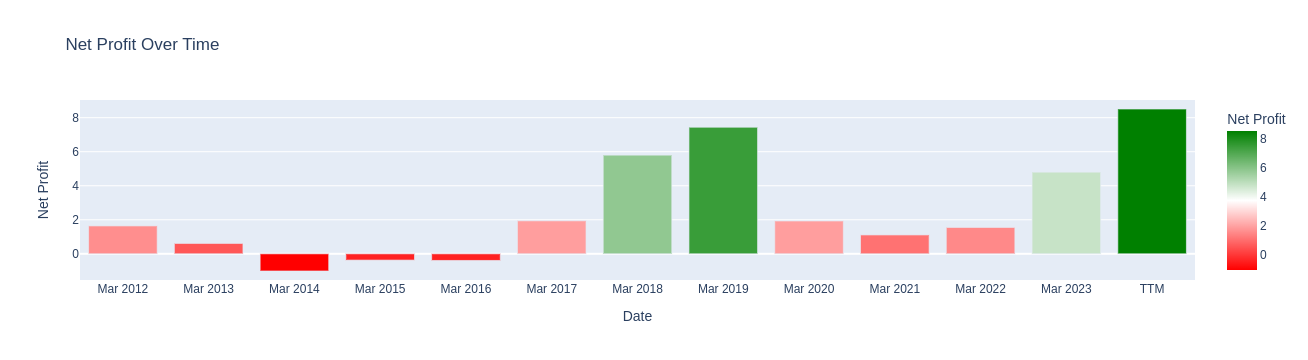

In [90]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
net_profit_row = df.iloc[10]

# Filter out non-numeric values and convert to float
numeric_values = pd.to_numeric(net_profit_row[1:], errors='coerce')

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Date': net_profit_row.index[1:],
    'Net Profit': numeric_values
})

# Create a bar plot using Plotly Express
fig = px.bar(plot_data, x='Date', y='Net Profit', title='Net Profit Over Time', color='Net Profit',
             color_continuous_scale=[(0, 'red'), (0.5, 'white'), (1, 'green')],
             range_color=[numeric_values.min(), numeric_values.max()])

# Show the plot
fig.show()


## Plotting OPM%

In [103]:
second_row = df.iloc[10]
print(second_row)

Data        EPS in Rs
Mar 2012         1.64
Mar 2013         0.61
Mar 2014        -1.01
Mar 2015        -0.37
Mar 2016        -0.39
Mar 2017         1.94
Mar 2018         5.80
Mar 2019         7.44
Mar 2020         1.93
Mar 2021         1.11
Mar 2022         1.55
Mar 2023         4.80
TTM              8.51
Name: 10, dtype: object


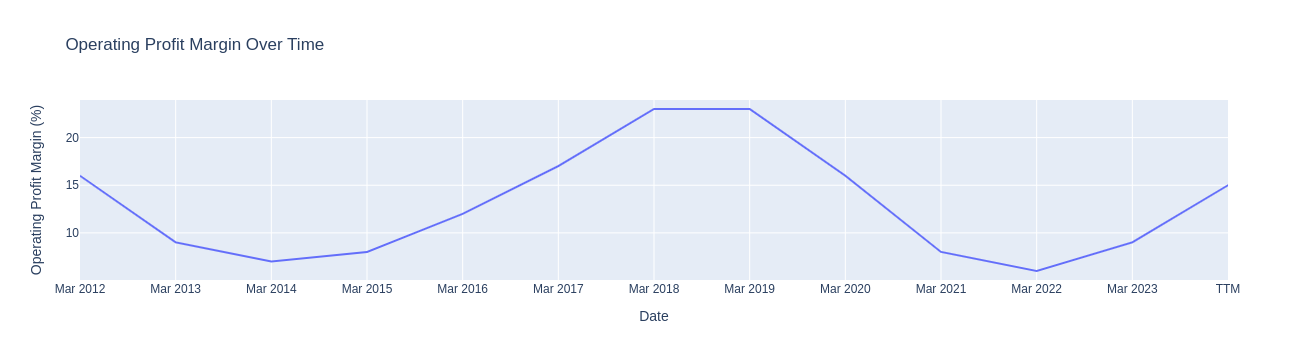

In [100]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
opm_row = df.iloc[3]

# Convert the 'OPM %' values to numeric
numeric_values = pd.to_numeric(opm_row[1:].str.rstrip('%'), errors='coerce')

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Date': opm_row.index[1:],
    'OPM %': numeric_values
})

# Create a line plot using Plotly Express
fig = px.line(plot_data, x='Date', y='OPM %', title='Operating Profit Margin Over Time',
              labels={'OPM %': 'Operating Profit Margin (%)'})

# Show the plot
fig.show()


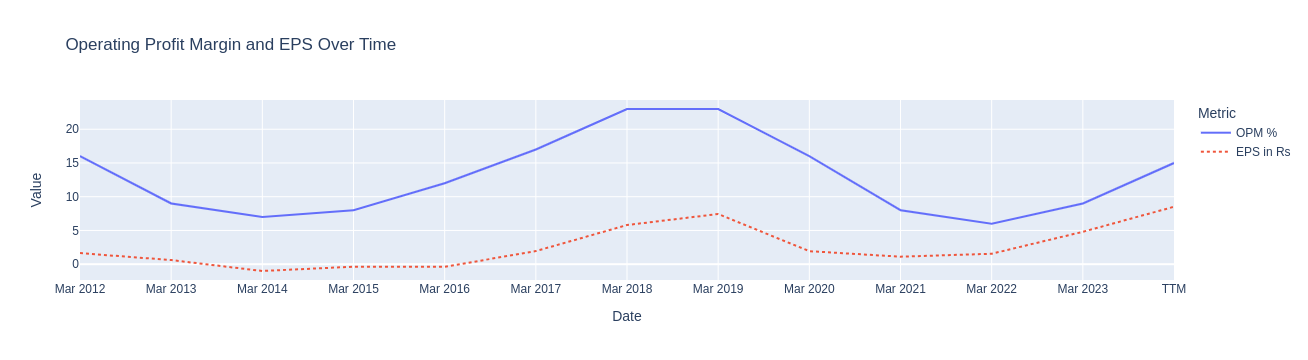

In [104]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
opm_row = df.iloc[3]
eps_row = df.iloc[10]

# Convert the 'OPM %' values to numeric
numeric_opm = pd.to_numeric(opm_row[1:].str.rstrip('%'), errors='coerce')

# Convert the 'EPS in Rs' values to numeric
numeric_eps = pd.to_numeric(eps_row[1:], errors='coerce')

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Date': opm_row.index[1:],
    'OPM %': numeric_opm,
    'EPS in Rs': numeric_eps
})

# Create a line plot using Plotly Express
fig = px.line(plot_data, x='Date', y=['OPM %', 'EPS in Rs'],
              title='Operating Profit Margin and EPS Over Time',
              labels={'value': 'Value', 'variable': 'Metric'},
              line_dash='variable')

# Show the plot
fig.show()


In [111]:
last_column = df['TTM']
print(last_column)

0     4037
1     3447
2      590
3      15%
4       41
5       63
6       47
7      520
8      NaN
9      373
10    8.51
11     NaN
Name: TTM, dtype: object


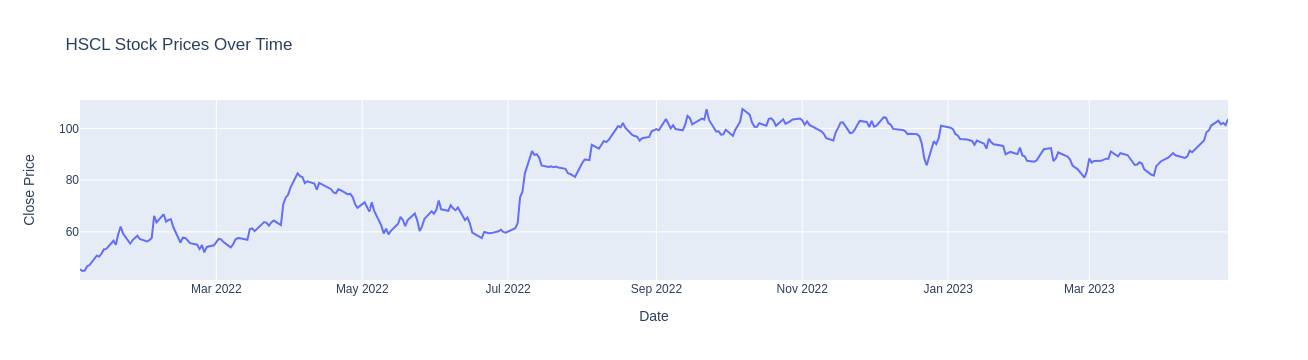

In [121]:
import pandas as pd
import plotly.express as px

# Read historical stock prices CSV file
stock_prices_csv = 'HSCL.NS.csv'  # Replace with the actual path to your CSV file
stock_prices = pd.read_csv(stock_prices_csv, parse_dates=['Date'], index_col='Date')

# Create a line plot using Plotly Express
fig = px.line(stock_prices, x=stock_prices.index, y='Close',
              title='HSCL Stock Prices Over Time',
              labels={'Close': 'Close Price', 'Date': 'Date'})

# Show the plot
fig.show()


In [ ]:
## 